In [18]:
import numpy as np

In [2]:
import h5py

In [3]:
ds_file = h5py.File('data_2k/rcv1_dataset.h5', 'r')

In [4]:
ds_file.keys()

<KeysViewHDF5 ['data', 'indices', 'indptr', 'target_names', 'targets']>

In [7]:
ds_file['indptr']

<HDF5 dataset "indptr": shape (804415,), type "<i4">

In [9]:
target_names = ds_file['target_names'][:]

In [10]:
target_names

array([b'C11', b'C12', b'C13', b'C14', b'C15', b'C151', b'C1511', b'C152',
       b'C16', b'C17', b'C171', b'C172', b'C173', b'C174', b'C18',
       b'C181', b'C182', b'C183', b'C21', b'C22', b'C23', b'C24', b'C31',
       b'C311', b'C312', b'C313', b'C32', b'C33', b'C331', b'C34', b'C41',
       b'C411', b'C42', b'CCAT', b'E11', b'E12', b'E121', b'E13', b'E131',
       b'E132', b'E14', b'E141', b'E142', b'E143', b'E21', b'E211',
       b'E212', b'E31', b'E311', b'E312', b'E313', b'E41', b'E411',
       b'E51', b'E511', b'E512', b'E513', b'E61', b'E71', b'ECAT', b'G15',
       b'G151', b'G152', b'G153', b'G154', b'G155', b'G156', b'G157',
       b'G158', b'G159', b'GCAT', b'GCRIM', b'GDEF', b'GDIP', b'GDIS',
       b'GENT', b'GENV', b'GFAS', b'GHEA', b'GJOB', b'GMIL', b'GOBIT',
       b'GODD', b'GPOL', b'GPRO', b'GREL', b'GSCI', b'GSPO', b'GTOUR',
       b'GVIO', b'GVOTE', b'GWEA', b'GWELF', b'M11', b'M12', b'M13',
       b'M131', b'M132', b'M14', b'M141', b'M142', b'M143', b'MCAT'],
 

In [33]:
categories_of_interest = [b'G154', b'GDIS', b'C12', b'E212', b'C151', b'E71', b'M143', b'M131']
category_names = [
    'European Community Monetary/Economic',
    'Disasters and Accidents',
    'Legal/Judicial',
    'Government Borrowings',
    'Accounts/Earnings',
    'Leading Economic Indicators',
    'Energy Markets',
    'Interbank Markets',
]

In [26]:
idx_of_interest = set(np.argwhere(target_names == x)[0][0] for x in categories_of_interest)
idx_of_interest

{np.int64(1),
 np.int64(5),
 np.int64(46),
 np.int64(58),
 np.int64(64),
 np.int64(74),
 np.int64(96),
 np.int64(101)}

In [13]:
targets = ds_file['targets'][:]
targets[0]

array([ 34,  59,  93,  94, 102], dtype=int32)

In [28]:
filtered_targets = [
    [x for x in doc if x in idx_of_interest]
    for doc in targets
]

In [32]:
docs_of_interest = {}
for idx, doc in enumerate(filtered_targets):
    if len(doc) == 1:
        docs_of_interest[idx] = doc[0]
len(docs_of_interest) 

191661

In [38]:
docs_per_type = {}
for doc_idx, cat_idx in docs_of_interest.items():
    cat_name = target_names[cat_idx]
    docs_per_type.setdefault(cat_name, list()).append(doc_idx)

docs_per_type = {k: np.array(v) for k,v in docs_per_type.items()}

In [40]:
docs_per_type

{b'C151': array([     2,      3,     30, ..., 804390, 804392, 804403],
       shape=(81628,)),
 b'C12': array([     9,     13,     19, ..., 804139, 804395, 804398],
       shape=(11486,)),
 b'M131': array([    12,     91,    156, ..., 804346, 804351, 804355],
       shape=(27931,)),
 b'M143': array([    21,    403,    406, ..., 804148, 804149, 804202],
       shape=(21924,)),
 b'E212': array([    68,     87,    105, ..., 803736, 803971, 803973],
       shape=(26820,)),
 b'E71': array([   111,    303,    304, ..., 803903, 803917, 803918], shape=(5264,)),
 b'G154': array([   221,    676,   1987, ..., 803720, 803780, 804352], shape=(8120,)),
 b'GDIS': array([   383,    726,    753, ..., 804393, 804401, 804413], shape=(8488,))}

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
latent_data = h5py.File('experiments/run_007/data_encoded.h5', 'r')

In [44]:
latent_data.keys()

<KeysViewHDF5 ['latent_representations', 'target_names', 'targets']>

In [47]:
latent = latent_data['latent_representations'][:]

In [42]:
sns.set_style()

In [50]:
latent.shape

(804414, 2)

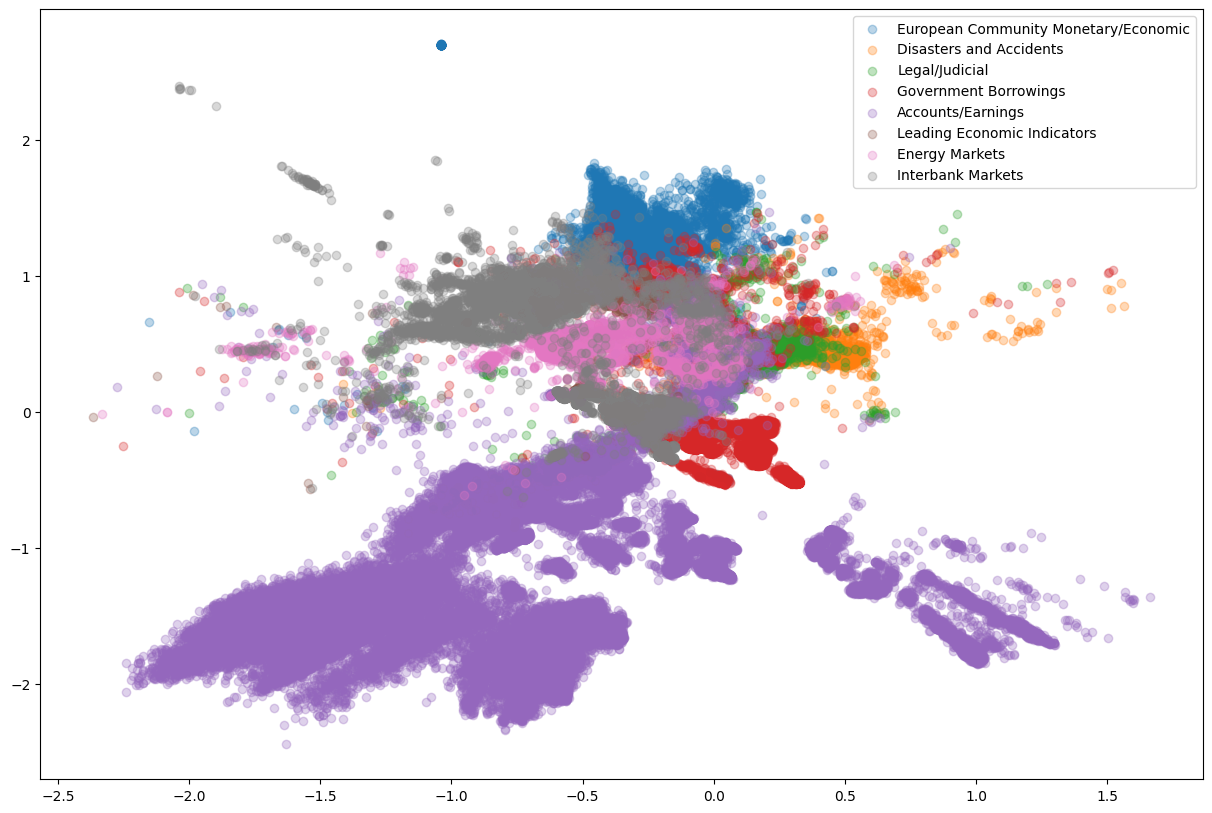

In [62]:
fig, ax = plt.subplots(figsize=(15,10))

for cat, name in zip(categories_of_interest, category_names):
    idxs = docs_per_type[cat]
    ax.scatter(x=latent[idxs,0], y=latent[idxs,1], alpha=0.3, label=name)

ax.legend()
fig.savefig('scatter.png')

In [59]:
metrics_data = h5py.File('experiments/run_007/training_metrics.h5', 'r')

In [64]:
metrics_data.keys()

<KeysViewHDF5 ['epoch', 'step', 'train_l1_loss', 'train_loss', 'train_recon_loss', 'val_l1_loss', 'val_loss', 'val_recon_loss']>

In [81]:
epoch = metrics_data['epoch'][:]
train_loss = metrics_data['train_loss'][:]
val_loss = metrics_data['val_loss'][:][:-1]

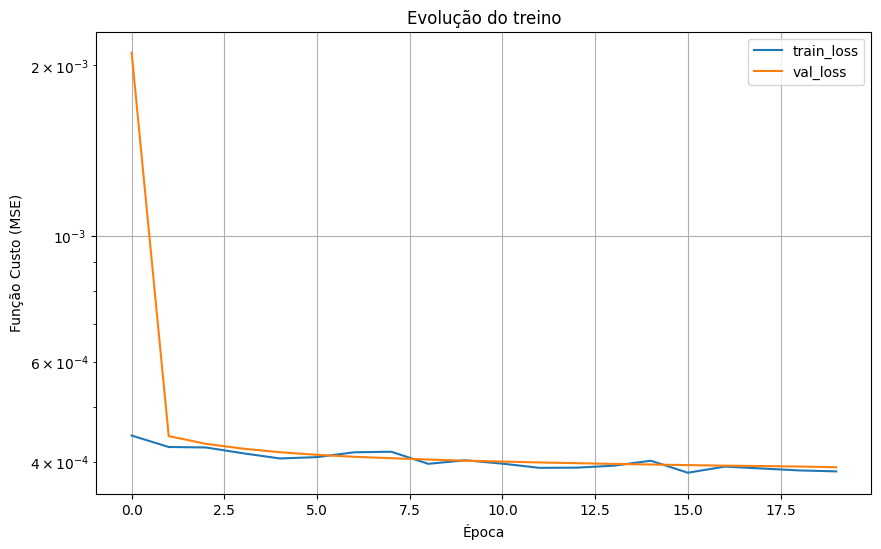

In [85]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(epoch, train_loss, label='train_loss')
ax.plot(epoch, val_loss, label='val_loss')
ax.set_yscale('log')
ax.grid()
ax.legend()
ax.set_xlabel('Época')
ax.set_ylabel('Função Custo (MSE)')
ax.set_title('Evolução do treino')
fig.savefig('train.png')